# Total Variation Loss

In [1]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [2]:
from src.transfer_style import Stylizer
from src.optimizers import GradientDescent, Adam, L_BFGS
from src.callback import Callback

In [3]:
ITERATIONS = 30

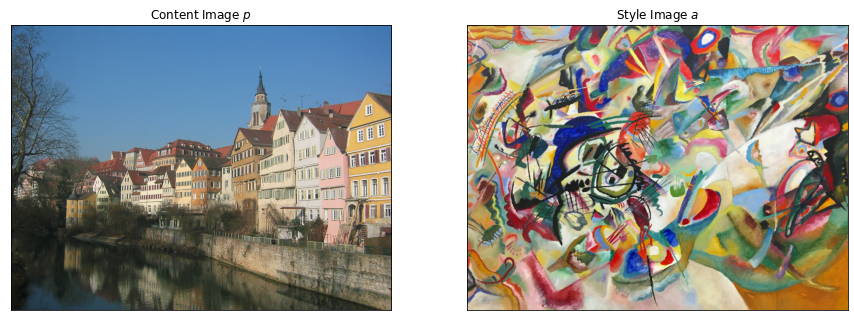

In [4]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
content = io.imread('img/content/tubingen.jpg')
ax = plt.imshow(content)
plt.title('Content Image $p$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.subplot(1, 2, 2)
style = io.imread('img/styles/composition-vii.jpg')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
ax = plt.imshow(style)
plt.title('Style Image $a$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

## TV loss = $0$

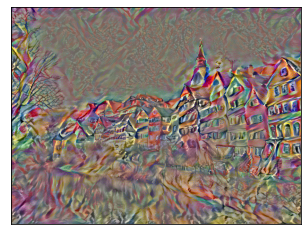

100%|██████████| 30/30 [09:45<00:00, 19.52s/it]


In [5]:
output = Stylizer(content_weight=1, style_weight=1e4, total_variation_weight=0)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=Callback('build/tv/0')
)
io.imsave('img/tv/0.jpg', output)

## TV loss = $1$

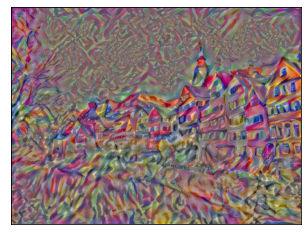

100%|██████████| 30/30 [09:24<00:00, 18.83s/it]


In [6]:
output = Stylizer(content_weight=1, style_weight=1e4, total_variation_weight=1)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=Callback('build/tv/1')
)
io.imsave('img/tv/1.jpg', output)

## TV loss = $10$

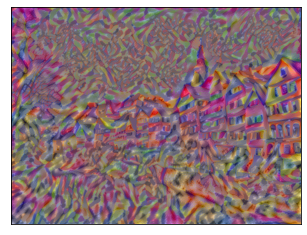

100%|██████████| 30/30 [09:36<00:00, 19.22s/it]


In [7]:
output = Stylizer(content_weight=1, style_weight=1e4, total_variation_weight=10)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=Callback('build/tv/10')
)
io.imsave('img/tv/10.jpg', output)

## TV loss = $100$

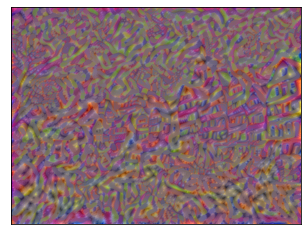

100%|██████████| 30/30 [09:10<00:00, 18.35s/it]


In [8]:
output = Stylizer(content_weight=1, style_weight=1e4, total_variation_weight=100)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=Callback('build/tv/100')
)
io.imsave('img/tv/100.jpg', output)

## TV loss = $1000$

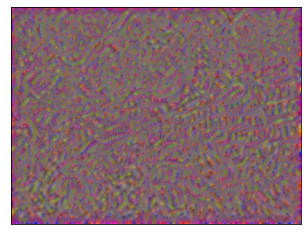

100%|██████████| 30/30 [09:06<00:00, 18.20s/it]


In [9]:
output = Stylizer(content_weight=1, style_weight=1e4, total_variation_weight=1000)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=Callback('build/tv/1000')
)
io.imsave('img/tv/1000.jpg', output)